In [ ]:
##############################################################################
#                                                                            #
#  Code for the USENIX Security '24 paper:                                   #
#  Code is not Natural Language: Unlock the Power of Semantics-Oriented      #
#             Graph Representation for Binary Code Similarity Detection      #
#                                                                            #
#  MIT License                                                               #
#                                                                            #
#  Copyright (c) 2023 SJTU NSSL Lab                                     #
#                                                                            #
##############################################################################

In [5]:
import pandas as pd
from utils import get_groupped_dataframe, id_map

In [6]:
## Experiment-1 Comparative Experiments - Table

result_fns = [
    "summary_xa-1000-100_Ds1_MRR_Recall_max.csv",
    "summary_xc-1000-100_Ds1_MRR_Recall_max.csv",
    "summary_xo-1000-100_Ds1_MRR_Recall_max.csv",
    "summary_xm-1000-10000_Ds1_MRR_Recall_max.csv",
    "summary_xo-1000-100-arch_x-bit_64_Ds1_MRR_Recall_max.csv",
    "summary_xc-1000-10000-arch_x-bit_64_Ds1_MRR_Recall_max.csv",
]

dfs = [get_groupped_dataframe(fn) for fn in result_fns]
df = pd.concat(map(lambda x: x[1], dfs),
               axis="columns", keys=map(lambda x: x[0], dfs))

selected = ['SAFE', 'Asm2Vec', 'Trex', 'GMN', 'jTrans', 'HermesSim']
columns = [(task, 'Recall_1@P100') for task in ['XA', 'XO', 'XC', 'x64-XO']] + \
    [(task, 'Recall_1@P%d' % poolsize)
     for task in ['XM', 'x64-XC'] for poolsize in [100, 10000]]
df = df.loc[selected][columns]
df


XA            XO            XC        x64-XO  \
          Recall_1@P100 Recall_1@P100 Recall_1@P100 Recall_1@P100   
SAFE             0.1340        0.2110        0.2010        0.1840   
Asm2Vec          0.0100        0.2460        0.2580        0.3180   
Trex             0.3120        0.4680        0.4540        0.5150   
GMN              0.7260        0.5030        0.5230        0.5240   
jTrans              NaN           NaN           NaN        0.6690   
HermesSim        0.9551        0.8099        0.7801        0.8188   

                     XM                        x64-XC                  
          Recall_1@P100 Recall_1@P10000 Recall_1@P100 Recall_1@P10000  
SAFE             0.0990          0.0140        0.1720          0.0810  
Asm2Vec          0.0700          0.0350        0.2900          0.1350  
Trex             0.2440          0.0860        0.4590          0.2620  
GMN              0.4470          0.1050        0.4800          0.2190  
jTrans              NaN             NaN        0.6500          0.3140  
HermesSim        0.7454          0.4382        0.7557          0.4806

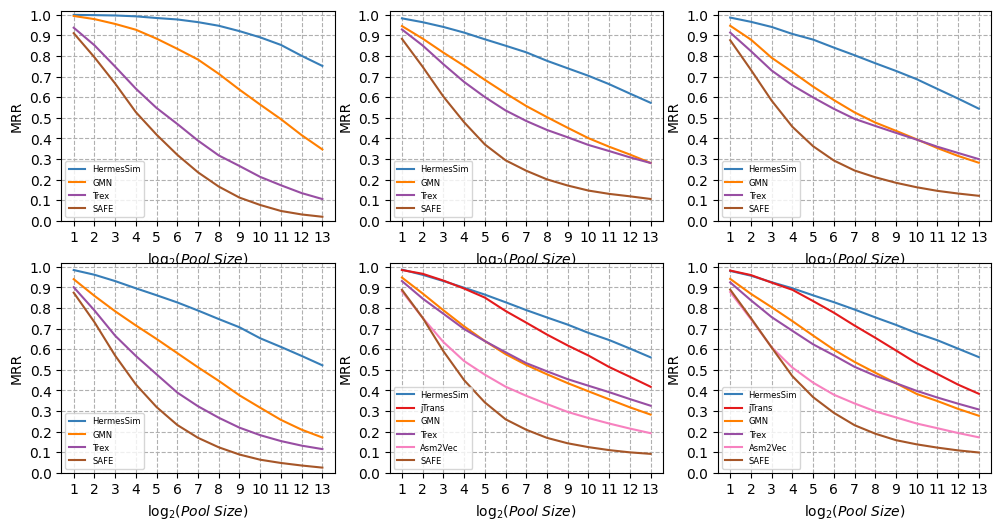

In [3]:
## Experiment-1 Comparative Experiments - Figures
import matplotlib
import matplotlib.pyplot as plt

result_fns = [
    "summary_xa-1000-8192_Ds1_MRR_Recall_max.csv",
    "summary_xc-1000-8192_Ds1_MRR_Recall_max.csv",
    "summary_xo-1000-8192_Ds1_MRR_Recall_max.csv",
    "summary_xm-1000-10000_Ds1_MRR_Recall_max.csv",
    "summary_xo-1000-8192-arch_x-bit_64_Ds1_MRR_Recall_max.csv",
    "summary_xc-1000-10000-arch_x-bit_64_Ds1_MRR_Recall_max.csv",
]

cmap = matplotlib.colormaps['Set1']
norm = matplotlib.colors.Normalize(vmin=1, vmax=7)
color_map = {
    "HermesSim": 2, 
    "jTrans": 1, 
    "GMN": 4, 
    "Trex": 3, 
    "Asm2Vec": 6, 
    "SAFE": 5, 
}
selected = ['SAFE', 'Trex', 'GMN', 'HermesSim']
selected_x64 = ['Asm2Vec', 'jTrans']

xi = list(range(1,14))  # log2(poolsize)
columns = ['MRR@P%d'%(1 << poolsize) for poolsize in xi]

fig_mrr, axs = plt.subplots(2,3, figsize=(12, 6))
for idx, result_fn in enumerate(result_fns):
    ## Process Dataframes
    name, df = get_groupped_dataframe(result_fn)
    df = df.loc[selected + (selected_x64 if 'x64' in name else [])][columns]
    df_list = sorted([(r.name, r.values) for _, r in df.iterrows()], key=lambda x: -id_map[x[0]])

    ## Begin Ploting
    ax = axs[idx//3][idx%3]
    for name, y in df_list:
        c = cmap(norm(color_map[name])) if name in color_map else None
        ax.plot(xi, y, label=name, color=c)
    ax.set_xticks(xi)
    y_s, y_e = 0, 102
    ax.set_ylim(y_s/100, y_e/100)
    ax.set_yticks([s/100 for s in range(y_s, y_e, 10)])
    ax.set_ylabel("MRR")
    ax.set_xlabel("$\mathrm{log}_{2}(Pool\ Size)$")
    ax.grid(linestyle="--")
    ax.legend(loc="lower left", prop={'size': 6})


In [4]:
## Experiment-2 Ablation Study

result_fns = [
    "summary_xa-1000-100_Ds1_MRR_Recall_max.csv",
    "summary_xc-1000-100_Ds1_MRR_Recall_max.csv",
    "summary_xo-1000-100_Ds1_MRR_Recall_max.csv",
    "summary_xm-1000-10000_Ds1_MRR_Recall_max.csv",
    "summary_xo-1000-100-arch_x-bit_64_Ds1_MRR_Recall_max.csv",
    "summary_xc-1000-10000-arch_x-bit_64_Ds1_MRR_Recall_max.csv",
]

dfs = [get_groupped_dataframe(fn) for fn in result_fns]
df = pd.concat(map(lambda x: x[1], dfs),
               axis="columns", keys=map(lambda x: x[0], dfs))

df['sort_id'] = [id_map.get(name, 0) for name in df.index]
df = df.sort_values(by="sort_id").drop(columns=['sort_id'])

dropped = ['SAFE', 'Asm2Vec', 'Trex', 'GMN', 'jTrans']
columns = [(task, 'Recall_1@P100') for task in ['XA', 'XO', 'XC', 'x64-XO']] + \
    [(task, 'Recall_1@P%d' % poolsize)
     for task in ['XM', 'x64-XC'] for poolsize in [100, 10000]]
df = df.drop(index=dropped)[columns]
df



XA            XO            XC        x64-XO  \
             Recall_1@P100 Recall_1@P100 Recall_1@P100 Recall_1@P100   
CFG-OPC200          0.9278        0.6767        0.6709        0.6995   
CFG-PalmTree           NaN           NaN           NaN        0.7077   
CFG-HBMP            0.9433        0.6948        0.6887        0.7204   
P-DFG               0.9344        0.7643        0.7412        0.7630   
P-CDFG              0.9461        0.7720        0.7528        0.7724   
P-ISCG              0.9511        0.7799        0.7477        0.7810   
P-TSCG              0.9545        0.7920        0.7620        0.7914   
Set2Set             0.8949        0.6717        0.6445        0.6916   
Softmax             0.9087        0.7294        0.7105        0.7399   
Gated               0.9346        0.7564        0.7251        0.7630   
HermesSim           0.9551        0.8099        0.7801        0.8188   

                        XM                        x64-XC                  
             Recall_1@P100 Recall_1@P10000 Recall_1@P100 Recall_1@P10000  
CFG-OPC200          0.6285          0.3199        0.6422          0.3684  
CFG-PalmTree           NaN             NaN        0.6605          0.3634  
CFG-HBMP            0.6525          0.3366        0.6716          0.3899  
P-DFG               0.6966          0.3740        0.6992          0.4282  
P-CDFG              0.7108          0.3858        0.7239          0.4363  
P-ISCG              0.7132          0.4009        0.7190          0.4421  
P-TSCG              0.7319          0.4133        0.7352          0.4642  
Set2Set             0.6115          0.2980        0.6071          0.3732  
Softmax             0.6432          0.3261        0.6690          0.4124  
Gated               0.6833          0.3844        0.6895          0.4393  
HermesSim           0.7454          0.4382        0.7557          0.4806